# Praktični primer

## Analiza Hacker News  dataseta

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)
pd.set_option('display.max_colwidth', None)

In [23]:
import re

domain_extractor_pattern = re.compile(r"https?:\/\/([\w\d-]*\.?[\w\d-]+\.[\w\d-]+)\/?.*")

def remove_subdomain_if_exists(full_domain):
    if full_domain and isinstance(full_domain, str):
        return ".".join(full_domain.split(".")[-2:])
    else:
        return None

# Uvoz podatkov v Pandas
hacker_news = pd.read_csv("data/hacker_news.csv")
hacker_news["created_at"] = pd.to_datetime(hacker_news["created_at"])
hacker_news["domain_source"] = hacker_news["url"].str.extract(domain_extractor_pattern)
hacker_news["domain_source"] = hacker_news["domain_source"].apply(remove_subdomain_if_exists)
hacker_news.head()

,id,title,url,num_points,num_comments,author,created_at,domain_source
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,2016-08-04 11:52:00,interactivedynamicvideo.com
1,11964716,Florida DJs May Face Felony for April Fools' Water Joke,http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/,2,1,vezycash,2016-06-23 22:20:00,thewire.com
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429,3,1,hswarna,2016-06-17 00:01:00,amazon.com
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0,8,2,walterbell,2015-09-30 04:12:00,nytimes.com
4,10482257,Title II kills investment? Comcast and other ISPs are now spending more,http://arstechnica.com/business/2015/10/comcast-and-other-isps-boost-network-investment-despite-net-neutrality/,53,22,Deinos,2015-10-31 09:48:00,arstechnica.com


## Top 10 virov novic (pie chart)


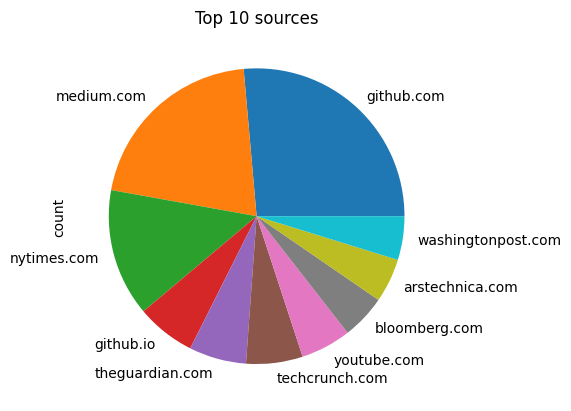

In [34]:
hacker_news["domain_source"].value_counts().head(10).plot(kind="pie", title="Top 10 sources")
plt.show()

## Dodamo programming_language stolpec

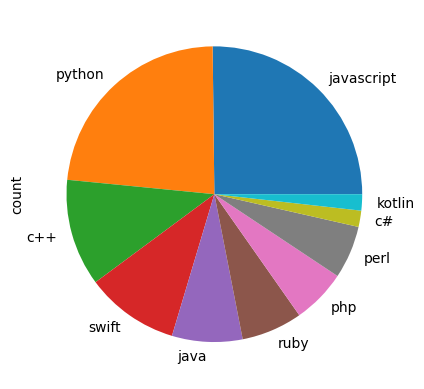

In [41]:
languages = ["javascript", "python", "kotlin", "perl", "ruby", "c++", "php", "c#", "swift", "matlab", "fortran", "java"]

def detect_programming_language_in_title(title):
    title = title.lower()
    for language in languages:
        if isinstance(title, str) and language in title:
            return language
    return None

hacker_news["language"] = hacker_news["title"].apply(detect_programming_language_in_title)
hacker_news["language"].value_counts().head(10).plot(kind="pie")
plt.show()